# Anemia
Es un trastorno sanguíneo en el que la sangre tiene una capacidad reducida para transportar oxígeno debido a una cantidad de glóbulos rojos inferior a la normal o a una reducción en la cantidad de hemoglobina.

Género: 0 - masculino, 1 - femenino 
Hemoglobina: la hemoglobina es una proteína en sus glóbulos rojos que transporta oxígeno a los órganos y tejidos de su cuerpo y transporta dióxido de carbono desde sus órganos y tejidos de regreso a sus pulmones. MCH: 
MCH es la abreviatura de "hemoglobina corpuscular media". Es la cantidad promedio en cada uno de sus glóbulos rojos de una proteína llamada hemoglobina, que transporta oxígeno por todo el cuerpo. 
MCHC: MCHC significa concentración de hemoglobina corpuscular media. Es una medida de la concentración promedio de hemoglobina dentro de un solo glóbulo rojo. 
MCV: MCV significa volumen corpuscular medio. Un análisis de sangre MCV mide el tamaño promedio de sus glóbulos rojos. Resultados: 0- no anémico, 1-anémico

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [17]:
df = pd.read_csv('anemia.csv')
df.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [18]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [19]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [20]:
df[['Gender', 'Result']] = df[['Gender', 'Result']].astype('category')
df.dtypes

Gender        category
Hemoglobin     float64
MCH            float64
MCHC           float64
MCV            float64
Result        category
dtype: object

In [21]:
# Descripcion del dataset
pd.set_option('display.precision', 1)
df.describe(include='all')

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.0,1421.0,1421.0,1421.0,1421.0,1421.0
unique,2.0,NaN,NaN,NaN,NaN,2.0
top,1.0,NaN,NaN,NaN,NaN,0.0
freq,740.0,NaN,NaN,NaN,NaN,801.0
mean,NaN,13.4,22.9,30.3,85.5,NaN
std,NaN,2.0,4.0,1.4,9.6,NaN
min,NaN,6.6,16.0,27.8,69.4,NaN
25%,NaN,11.7,19.4,29.0,77.3,NaN
50%,NaN,13.2,22.7,30.4,85.3,NaN
75%,NaN,15.0,26.2,31.4,94.2,NaN


<AxesSubplot:xlabel='Result', ylabel='count'>

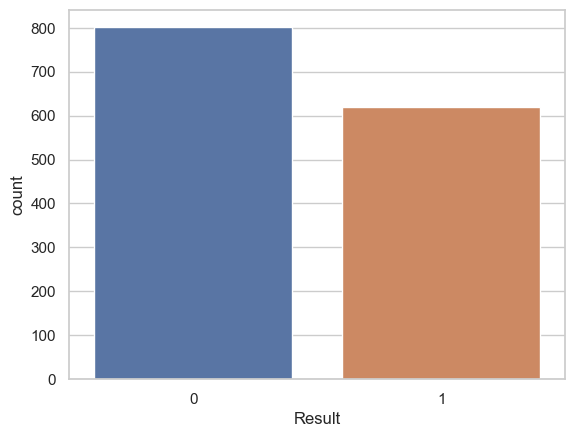

In [22]:
sb.countplot(x=df['Result'])

<AxesSubplot:xlabel='Result', ylabel='count'>

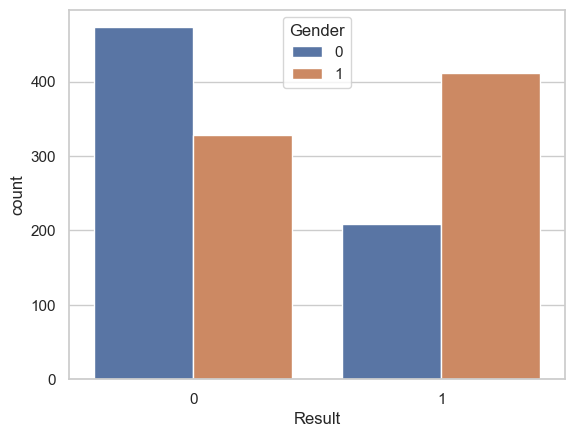

In [23]:
sb.countplot(x=df['Result'], hue=df['Gender'])

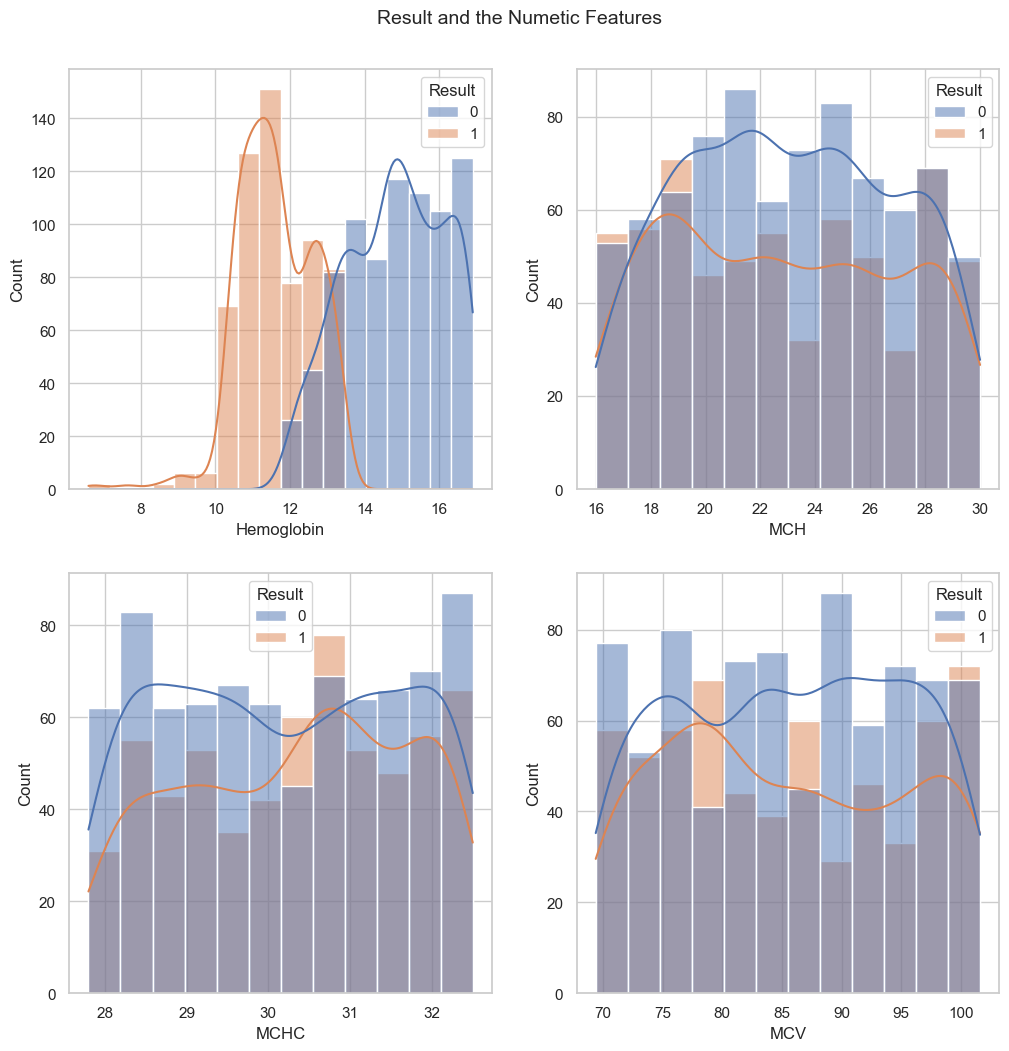

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sb.histplot(data=df, x=df['Hemoglobin'], hue=df['Result'], kde=True, ax=ax[0,0])
sb.histplot(data=df, x=df['MCH'], hue=df['Result'], kde=True, ax=ax[0,1])
sb.histplot(data=df, x=df['MCHC'], hue=df['Result'], kde=True, ax=ax[1,0])
sb.histplot(data=df, x=df['MCV'], hue=df['Result'], kde=True, ax=ax[1,1])
fig.suptitle('Result and the Numetic Features', fontsize=14, y=0.93)
plt.show()

Se observa que si tengo la hemoglobina demasiado baja es muy probable que sufra de anemia

In [32]:
y = df[df.columns[-1]]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Result, dtype: category
Categories (2, int64): [0, 1]

In [62]:
X = df.drop(columns = ['Result'])
X

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


### Escaldo de datos

In [63]:
escalador = StandardScaler()
X = escalador.fit_transform(X)
print(X)

[[ 0.95930718  0.75348274 -0.05182232 -0.82207061 -0.18932081]
 [-1.04241896  1.26010665  0.62862494 -1.39333406 -1.40385665]
 [-1.04241896 -2.23559834 -0.35424332 -0.46503096 -1.48690183]
 ...
 [ 0.95930718 -0.1584403  -1.31190984 -1.53614992 -0.50074026]
 [-1.04241896  0.44950839 -1.68993609 -0.53643889  1.00445372]
 [-1.04241896 -0.81705139 -0.42984857 -1.32192613  1.30549252]]


In [64]:
X.shape[0]

1421

### Dividir entre datos de entrenamiento y test

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [66]:
y = y.astype(float)
y.dtypes

dtype('float64')

In [67]:
print("X Train: {}, X Test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (1136, 5), X Test: (285, 5), y_train: (1136,), y_test: (285,)


In [68]:
n_entradas = X_train.shape[1]
n_entradas

5

### Tensores

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset

In [105]:
t_X_train = torch.from_numpy(X_train).float().to("cpu") #MPS
t_X_test = torch.from_numpy(X_test).float().to("cpu")
t_y_train = torch.from_numpy(y_train.values).float().to("cpu")
t_y_test = torch.from_numpy(y_test.values).float().to("cpu")
t_y_train = t_y_train[:,None] #Agregar una dimension
t_y_test = t_y_test[:, None]#Agregar una dimension

In [106]:
test = TensorDataset(t_X_test, t_y_test)
print(test[0])

(tensor([ 0.9593, -0.0571, -1.3371,  1.5344,  1.6584]), tensor([1.]))


In [107]:
print(test[284])

(tensor([ 0.9593, -0.1584, -0.1778,  0.8917,  0.1844]), tensor([1.]))


In [108]:
t_y_train

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])

### Construir la red Neuronal

In [109]:
class Perceptron(nn.Module):
    
    def __init__(self, n_entradas):
        super(Perceptron, self).__init__()
        self.linear1 = nn.Linear(n_entradas, 20)
        self.linear2 = nn.Linear(20, 15)
        self.linear3 = nn.Linear(15, 7)
        self.linear4 = nn.Linear(7, 1)
        
    def forward(self, inputs):
        pred_1 = torch.relu(input=self.linear1(inputs))
        pred_2 = torch.relu(input = self.linear2(pred_1))
        pred_3 = torch.sigmoid(input = self.linear3(pred_2))
        pred_f = torch.sigmoid(input = self.linear4(pred_3))
        return pred_f

In [111]:
%%time
lr = 0.001
epochs = 10000
estatus_print = 100 #Se va a usar para imprimir el error cada 100 muestras

model = Perceptron(n_entradas=n_entradas)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr) 
print("Arquitectura del modelo: {}".format(model))
historico = pd.DataFrame()

print("Entranando el modelo")
for epoch in range(1, epochs+1):
    y_pred= model.forward(t_X_train)
    #y_pred = y_pred.round() No aprende la red con esta lineal de codigo
    loss = loss_fn(input=y_pred, target=t_y_train)
    loss.backward()
    optimizer.step() #Calcular los nuevos pesos
    optimizer.zero_grad() #No acumal los gradientes
    
    if epoch % estatus_print == 0:
        print(f"\nEpoch {epoch} \t Loss: {round(loss.item(), 4)}")
    
    with torch.no_grad(): #No queremos que nuestros pesos se modifiquen
        y_pred = model(t_X_test)
        y_pred_class = y_pred.round()
        correct = (y_pred_class == t_y_test).sum()
        accuracy = 100 * correct / float(len(t_y_test))
        if epoch % estatus_print == 0:
            print("Accuracy: {}".format(accuracy.item()))
    
    df_tmp = pd.DataFrame(data={
        'Epoch': epoch,
        'Loss': round(loss.item(), 4),
        'Accuracy': round(accuracy.item(), 4)
    }, index=[0])
    historico = pd.concat(objs=[historico, df_tmp], ignore_index=True, sort=False)

print("Accuracy final: {}".format(round(accuracy.item(), 4)))

Arquitectura del modelo: Perceptron(
  (linear1): Linear(in_features=5, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (linear3): Linear(in_features=15, out_features=7, bias=True)
  (linear4): Linear(in_features=7, out_features=1, bias=True)
)
Entranando el modelo

Epoch 100 	 Loss: 0.5459
Accuracy: 84.21052551269531

Epoch 200 	 Loss: 0.2575
Accuracy: 98.59648895263672

Epoch 300 	 Loss: 0.1611
Accuracy: 99.29824829101562

Epoch 400 	 Loss: 0.1152
Accuracy: 99.64912414550781

Epoch 500 	 Loss: 0.0877
Accuracy: 100.0

Epoch 600 	 Loss: 0.0695
Accuracy: 100.0

Epoch 700 	 Loss: 0.0566
Accuracy: 100.0

Epoch 800 	 Loss: 0.0472
Accuracy: 100.0

Epoch 900 	 Loss: 0.04
Accuracy: 100.0

Epoch 1000 	 Loss: 0.0344
Accuracy: 100.0

Epoch 1100 	 Loss: 0.0299
Accuracy: 100.0

Epoch 1200 	 Loss: 0.0263
Accuracy: 100.0

Epoch 1300 	 Loss: 0.0232
Accuracy: 100.0

Epoch 1400 	 Loss: 0.0207
Accuracy: 100.0

Epoch 1500 	 Loss: 0.0185
Accuracy: 100.0

Epoch

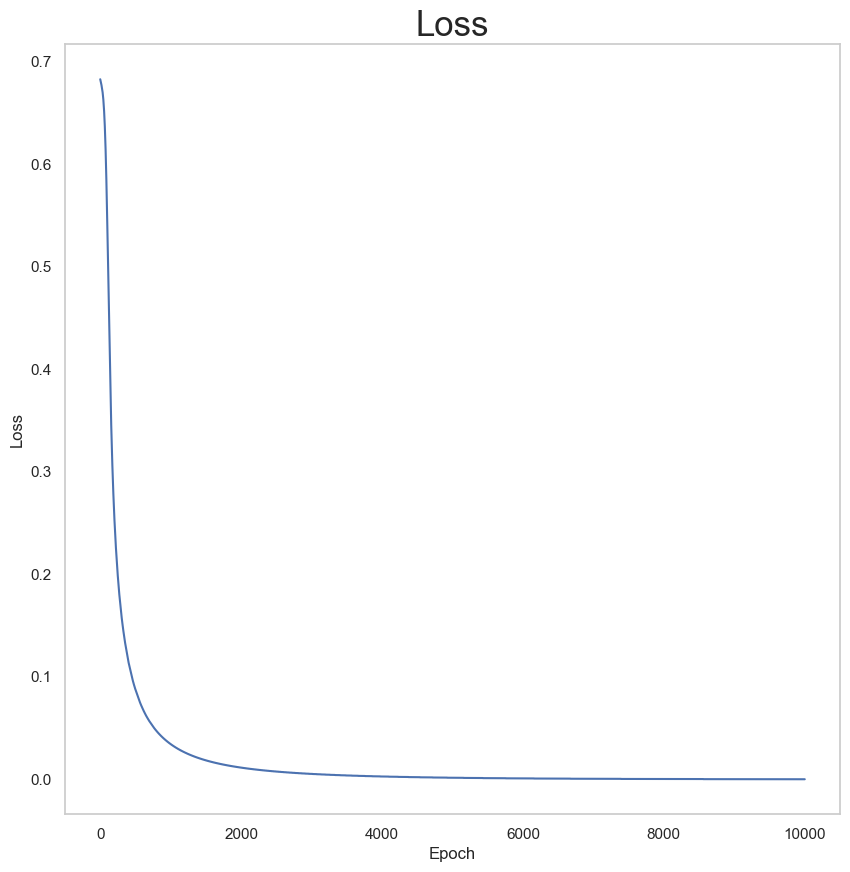

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Loss'], label='Loss')
plt.title("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid()
plt.show()

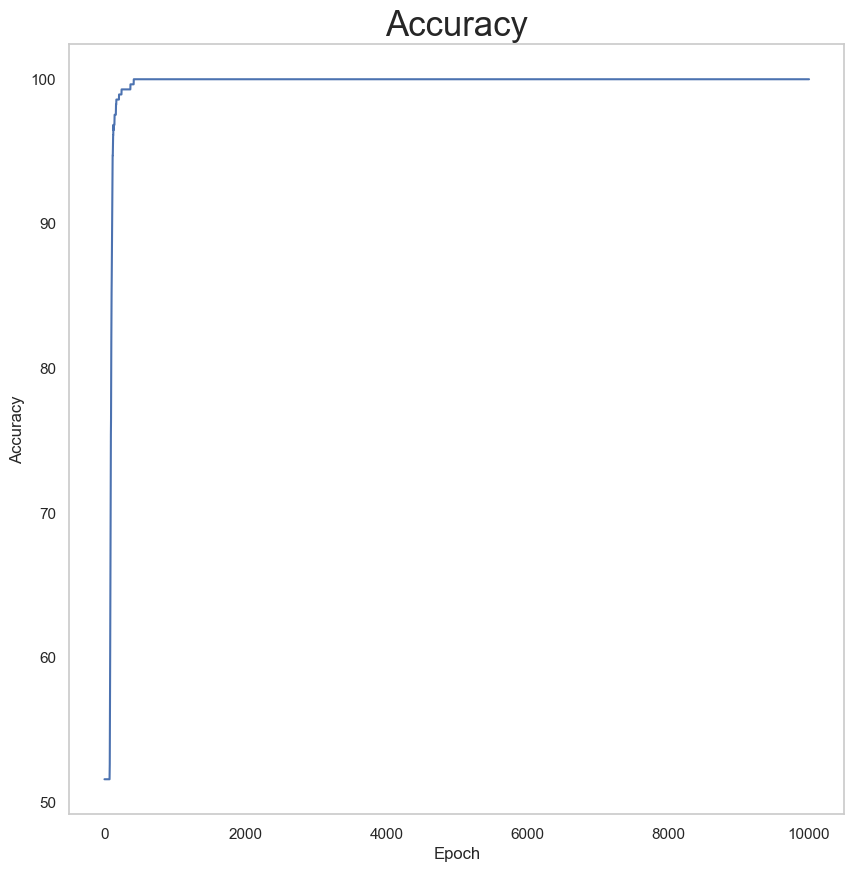

In [113]:
plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Accuracy'], label='Accuracy')
plt.title("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid()
plt.show()

### Predicciones

In [114]:
t_X_test[5]

tensor([-1.0424, -1.3743, -0.4046, -0.8221, -0.7084])

In [118]:
prediccion = model(t_X_test[5])
print(prediccion.round())

tensor([1.], grad_fn=<RoundBackward0>)


In [124]:
t_y_pred = model(t_X_test).round()

In [127]:
target_names = ['class 0', 'class 1']
print(classification_report(t_y_test.detach().numpy(), t_y_pred.detach().numpy(), target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       147
     class 1       1.00      1.00      1.00       138

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [128]:
print(confusion_matrix(t_y_test.detach().numpy(), t_y_pred.detach().numpy()))

[[147   0]
 [  0 138]]


In [129]:
from sklearn.metrics import roc_curve

In [131]:
fpr, tpr, thresholds = roc_curve(t_y_test.detach().numpy(), t_y_pred.detach().numpy())

In [137]:
print(fpr,tpr)

[0. 0. 1.] [0. 1. 1.]


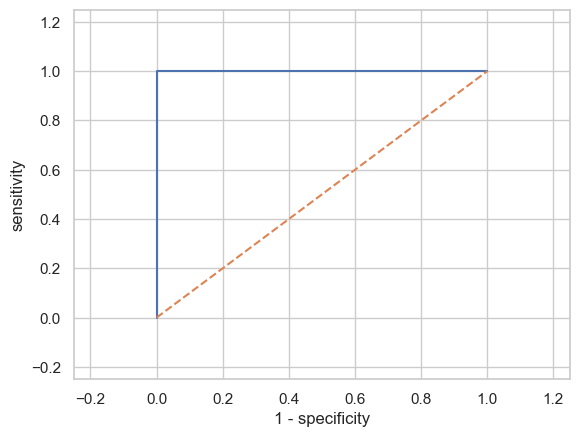

In [140]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()